# 신경망

**[용어 확인]**

- 입력 층, 은닉 층, 출력 층 (Input layer, Hidden layer, Output layer)

- 편향, 가중치 (bias, weight)

- 뉴런, 노드 (neuron, node)

In [ ]:
# 라이브러리
import numpy as np
import matplotlib.pyplot as plt

# 활성화 함수

In [ ]:
# 계단 함수
def step_function(x):
    y = x>0
    return y.astype(np.int)

In [ ]:
def step_function(x):
    return np.array(x>0, dtype = np.int)

In [ ]:
y = step_function(0)
print(y)
print(type(y))

0
<class 'numpy.ndarray'>


In [ ]:
# numpy 배열에 비교 연산
x = np.array([-1.0, 1.0, 2.0])
print(x)

# 비교 연산
y = x > 0
print('\n<비교 연산의 결과>')
print(type(y)) # 넘파이 배열로 나오는 거 확인
print(y) # bool type

print('\n<int type으로 변환 후>')
y = y.astype(np.int)
print(y)

[-1.  1.  2.]

<비교 연산의 결과>
<class 'numpy.ndarray'>
[False  True  True]

<int type으로 변환 후>
[0 1 1]


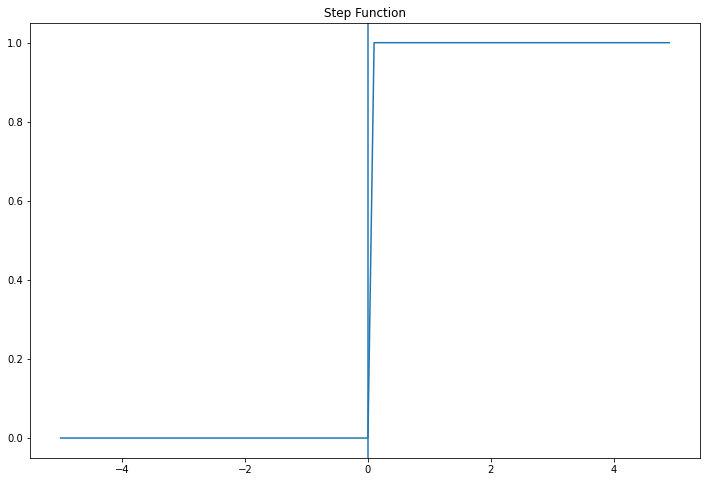

In [ ]:
# 계단 함수 그래프 그리기
x = np.arange(-5, 5, 0.1)
y = step_function(x)

plt.figure(figsize=(12,8))
plt.title('Step Function')
plt.axvline(x=0)
plt.plot(x,y)
plt.show()

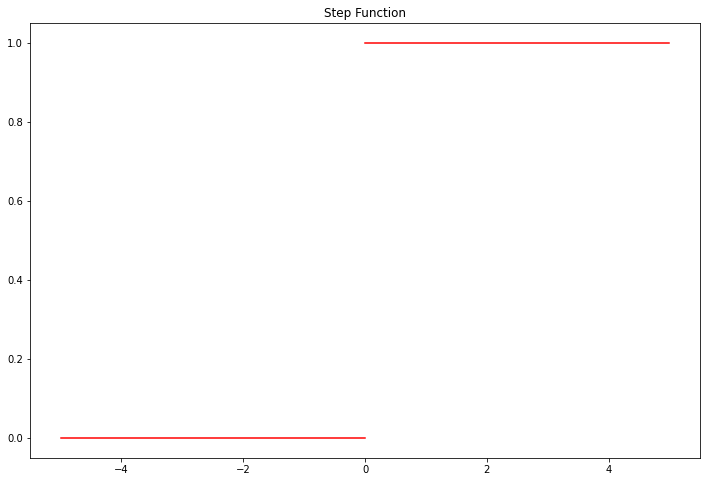

In [ ]:
t = 0.005
x1= np.arange(-5, 0, t)
y1 = step_function(x1)

x2= np.arange(t, 5, t)
y2= step_function(x2)

plt.figure(figsize=(12,8))
plt.title('Step Function')
plt.plot(x1,y1, 'r')
plt.plot(x2,y2, 'r')
plt.show()

In [ ]:
# 시그모이드 함수 구현 
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [ ]:
x = np.array([-1.0, 1.0, 2.0])
print(sigmoid(x))

[0.26894142 0.73105858 0.88079708]


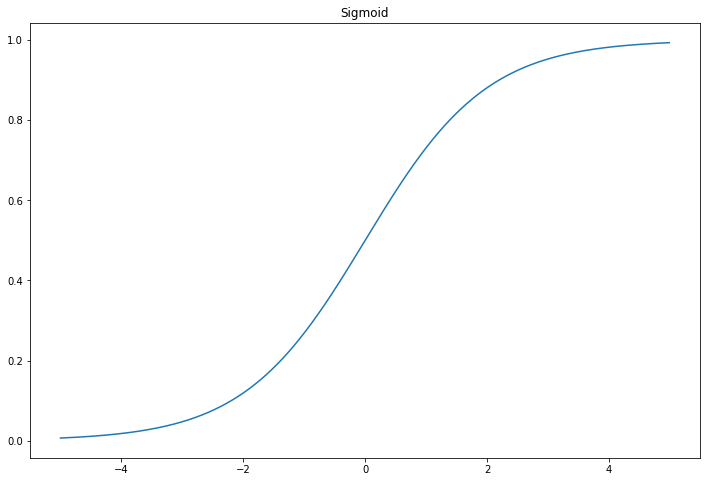

In [ ]:
# 시그모이드 그래프 그리기
x = np.arange(-5.0, 5.0, 0.01)
y = sigmoid(x)
plt.figure(figsize=(12,8))
plt.title('Sigmoid')
plt.plot(x,y)
plt.show()

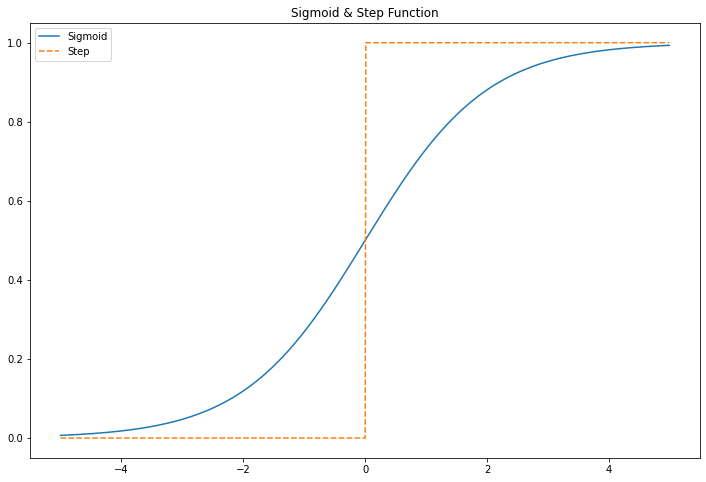

In [ ]:
# 시그모이드, 계단 함수 비교
x = np.arange(-5.0, 5.0, 0.01)
y1 = sigmoid(x)
y2 = step_function(x)

plt.figure(figsize=(12,8))
plt.title('Sigmoid & Step Function')
plt.plot(x,y1, label = 'Sigmoid')
plt.plot(x,y2,'--', label = 'Step')
plt.legend()
plt.show()

In [ ]:
# ReLU 함수
def relu(x):
    return np.maximum(0,x)

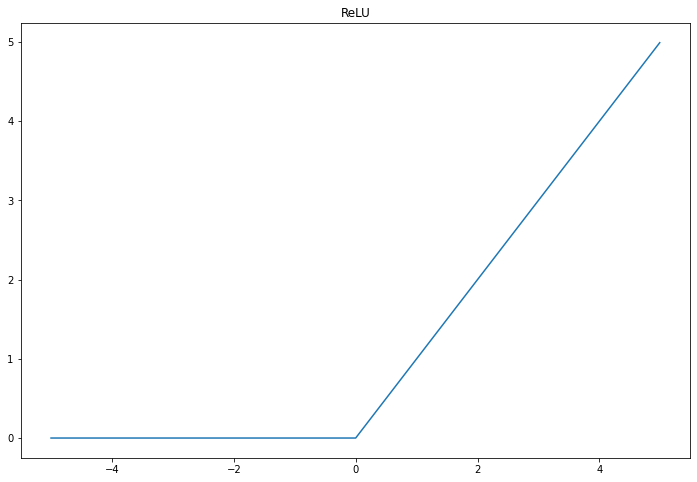

In [ ]:
x = np.arange(-5.0, 5.0, 0.01)
y = relu(x)
plt.figure(figsize=(12,8))
plt.title('ReLU')
plt.plot(x,y)
plt.show()

# 다차원 배열

In [ ]:
A = np.array([1, 2, 3, 4])
print(A)
print(A.ndim)
print(A.shape)

[1 2 3 4]
1
(4,)


In [ ]:
B = np.array([ [1,2], [3,4], [5,6] ])
print(B)
print(B.ndim)
print(B.shape)

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


Numpy에서 행렬의 곱

- dot()
- @, matmul()

두 인수 중 하나가 nDim의 경우(n>2) 연산이 다름

일단은 책에서 다루는 dot을 쓰자.

In [ ]:
# 행렬 곱
A = np.array([ [1, 2], [3, 4] ])
B = np.array([ [5, 6], [7, 8] ])

# dot과 matmul은 2차원 이하에서는 같음
C = np.dot(A,B)
D = np.matmul(A,B) # @연산자, D = A@B 와 같음

print(C)
print(D)

# matmul은 스칼라 곱이 안된다. 
print(np.dot(3,A))
#print(np.matmul(3,B))

[[19 22]
 [43 50]]
[[19 22]
 [43 50]]
[[ 3  6]
 [ 9 12]]


In [ ]:
# shape를 잘 맞춰주자.
def dot_test(A,B):
    try:
        C = np.dot(A,B)
        print(C)
        print(f'계산 결과인 행렬의 shape => {C.shape}')
    except:
        print('행렬 곱을 할수가 음슴')

A = np.array([[1,2,3], [4,5,6]]) # 2,3
B = np.array([[1,2],[3,4],[5,6]]) # 3,2

print('< case1 >')
dot_test(A,B) # 2,2

C = np.array([ [1,2,3], [4,5,6] ]) # 2,3
D = np.array([ [1,2],[3,4] ]) # 2,2
print('\n< case2 >')
dot_test(C,D)

< case1 >
[[22 28]
 [49 64]]
계산 결과인 행렬의 shape => (2, 2)

< case2 >
행렬 곱을 할수가 음슴


In [ ]:
# 차원이 다를 때도 마찬가지
A = np.array([ [1,2], [3,4], [5,6] ]) # 3,2
B = np.array([7,8]) # 2,1

dot_test(A,B)

[23 53 83]
계산 결과인 행렬의 shape => (3,)


In [ ]:
# 신경망에서 행렬의 곱 구현
X = np.array([1, 2]) # 1, 2
W = np.array([ [1, 3, 5], [2, 4, 6] ]) # 2, 3

Y = np.dot(X,W)
print(Y)
print(Y.shape)

[ 5 11 17]
(3,)


# 3층 신경망 구현하기

In [ ]:
# 입력층에서 다음층으로
X = np.array([1, 0.5]) # 1,2
W1 = np.array([ [0.1, 0.3, 0.5], [0.2, 0.4, 0.6] ]) # 2,3
B1 = np.array([0.1, 0.2, 0.3]) # bias

A1 = np.dot(X,W1) + B1 # 1,3
print(A1)

Z1 = sigmoid(A1) # 1,3
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [ ]:
# 다음층으로
W2 = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]]) # 3,2
B2 = np.array([0.1,0.2]) # bias
print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1,W2) + B2 # 1,2
Z2 = sigmoid(A2) # 1,2
print()
print(A2)
print(Z2)

(3,)
(3, 2)
(2,)

[0.51615984 1.21402696]
[0.62624937 0.7710107 ]


In [ ]:
# 항등 함수
def identity_function(x):
    return x

In [ ]:
W3 = np.array([[0.1,0.3], [0.2, 0.4]]) # 2,2
B3 = np.array([0.1,0.2])

A3 = np.dot(Z2,W3) + B3 # 1,2
Y = identity_function(A3) # A3이랑 똑같음 그냥 통일하려고 항등 함수도 사용

print(A3)
print(Y)

[0.31682708 0.69627909]
[0.31682708 0.69627909]


In [ ]:
# 구현 정리

def init_network():
    # 신경망 초기화
    network = {}

    network['W1'] = np.array([ [0.1, 0.3, 0.5], [0.2, 0.4, 0.6] ]) # 2,3
    network['b1'] = np.array([0.1, 0.2, 0.3]) # bias
    network['W2'] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]]) # 3,2
    network['b2'] = np.array([0.1,0.2]) # bias
    network['W3'] = np.array([[0.1,0.3], [0.2, 0.4]]) # 2,2
    network['b3'] = np.array([0.1,0.2])

    return network

def forward(network, x):
    W1,W2,W3 = network['W1'], network['W2'], network['W3']
    b1,b2,b3 = network['b1'], network['b2'], network['b3']

    # 입력층 => 1층
    a1 = np.dot(x,W1) + b1 
    z1 = sigmoid(a1) 
    # 1층 => 2층
    a2 = np.dot(z1,W2) + b2
    z2 = sigmoid(a2)
    # 2층 => 출력층
    a3= np.dot(z2,W3) + b3
    y = identity_function(a3)

    return y

In [ ]:
network = init_network() # 신경망 초기화
x = np.array([1, 0.5]) # 입력 
y = forward(network,x)
print(y)

[0.31682708 0.69627909]


In [ ]:
print(network)
print(type(network))

{'W1': array([[0.1, 0.3, 0.5],
       [0.2, 0.4, 0.6]]), 'b1': array([0.1, 0.2, 0.3]), 'W2': array([[0.1, 0.4],
       [0.2, 0.5],
       [0.3, 0.6]]), 'b2': array([0.1, 0.2]), 'W3': array([[0.1, 0.3],
       [0.2, 0.4]]), 'b3': array([0.1, 0.2])}
<class 'dict'>


# 출력층 설계하기

In [ ]:
# 그림 3-22 흐름
a1 = 0.3
a2 = 2.9
a3 = 4.0
A = np.array([a1, a2, a3])
exp_A = np.exp(A)
print(exp_A)

[ 1.34985881 18.17414537 54.59815003]


In [ ]:
sum_exp_A = np.sum(exp_A)
print(sum_exp_A)

74.1221542101633


In [ ]:
y = exp_A / sum_exp_A
print(y) # y1, y2, y3

[0.01821127 0.24519181 0.73659691]


In [ ]:
# 소프트맥스 함수 구현
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_A

    return y

위의 구현대로 하면 오버플로 문제가 발생한다.


$e^{1000}$ => inf(nan)



In [ ]:
# 예시
A = np.array([1010, 1000, 990])
y = np.exp(A) / np.sum(np.exp(A))
print(y)

[nan nan nan]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# 개선 방안
C = np.max(A) # 임의의 C를 빼준다. 주로 C값은 최댓값을 사용
new = A-C 
print(new)

new_y = np.exp(new) / np.sum(np.exp(new))
print(new_y)

[  0 -10 -20]
[9.99954600e-01 4.53978686e-05 2.06106005e-09]


In [ ]:
# 개선한 softmax 함수를 구현
def softmax(a):
    c = np.max(a) # 최댓값을 빼주자
    exp_a = np.exp(a-c) 
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

In [ ]:
# 함수 사용 
A = np.array([1010, 1000, 990])
y = softmax(A)
print(y)
print(np.sum(y)) # 소프트맥스 함수의 출력의 총합 1

[9.99954600e-01 4.53978686e-05 2.06106005e-09]
1.0


In [ ]:
A = np.array([0.3, 2.9, 4.0])
y = softmax(A)

percentage = y * 100

print(f'출력을 확률(%)로 차례대로 나타낸 결과 => {percentage}')
print(f'확률이 가장 높은 클래스 => {np.argmax(y)}')

출력을 확률(%)로 차례대로 나타낸 결과 => [ 1.82112733 24.51918129 73.65969138]
확률이 가장 높은 클래스 => 2


출력층의 노드 수는 문제에 맞게 설정해야함.

분류 문제에서 일반적으로 출력층의 노드 수는 분류하고 싶은 클래스 수로 설정

# 손글씨 숫자 인식

이미 학습된 매개변수(가중치, 편향) 을 사용해 학습 과정 생략,

추론 과정(순전파)만 구현해서 손글씨 숫자 분류를 해보겠다.

In [ ]:
import os
import sys

In [ ]:
current = os.getcwd() # os.getcwd()는 현재 디렉토리를 반환한다.
print(current)

/content


In [ ]:
# os.chdir(path) 를 이용해서 현재 디렉토리를 이동 가능

path = '/content/drive/MyDrive/deep-learning-from-scratch-master'
os.chdir(path)
#os.chdir("/content/drive/MyDrive/deep-learning-from-scratch-master")

In [ ]:
 # 현재 디렉토리 다시 확인
current = os.getcwd()
print(current)

/content/drive/MyDrive/deep-learning-from-scratch-master


In [ ]:
sys.path # 현재 기준에서 파이썬 라이브러리들이 설치 돼 있는 라이브러리 확인 가능

['',
 '/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython']

In [ ]:
sys.path.append(os.chdir) # append를 통해 추가해주자.

In [ ]:
sys.path # 잘 추가됐는지 확인

['',
 '/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython',
 <function posix.chdir>]

In [ ]:
# 한 과정으로
import sys
import os
path = '/content/drive/MyDrive/deep-learning-from-scratch-master'
os.chdir(path)

sys.path.append(os.chdir)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [ ]:
# 이렇게 원래 반환 형식대로 튜플로 받을 수도 있다.
train, test = load_mnist(flatten=True, normalize=False, one_hot_label=True)
print(train)
print(test)

(array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]]))
(array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]))


In [ ]:
print(train[1][0]) # 원 핫 인코딩 확인

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
import os
import sys
import numpy as np
from PIL import Image
path = '/content/drive/MyDrive/deep-learning-from-scratch-master'
os.chdir(path)
sys.path.append(os.chdir)
from dataset.mnist import load_mnist

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

In [ ]:
img = x_train[0]
label = t_train[0]
print(label) # 0 번째 인덱스에 해당하는 데이터의 답은 5임

5


In [ ]:
print(img.shape) # 1차원 배열로 펴져있음 

(784,)


In [ ]:
# 흑백 이미지는 2차원이므로 다시 원 형태로 바꿔주자
img = img.reshape(28,28) #img.reshape(28,28) 만 치면 img 는 그대로 있다 반드시 반환을 해줍시다.
print(img.shape)

(28, 28)


In [ ]:
img_show(img) # 이러면 colab에서는 아무 것도 안나온다.

In [ ]:
import matplotlib.pyplot as plt
 # 함수를 바꿔줍시다.
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    #pil_img.show() 얘 없애고
    plt.imshow(pil_img)
    plt.show()

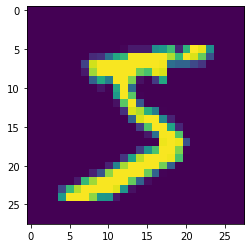

In [ ]:
img_show(img)

In [ ]:
# 두번째 데이터로 그냥 더 쉽게 해보자..
second_img = x_train[1]
second_img = second_img.reshape(28,28)

second_label = t_train[1]
print(second_label) # 답은 0

0


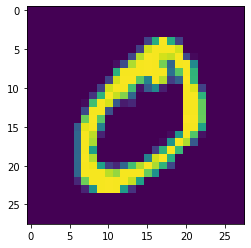



<흑백>


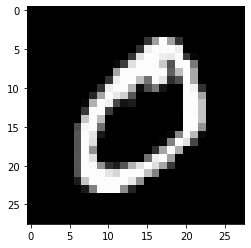

In [ ]:
# 복잡한 함수 쓸거없이 그냥 이렇게 두 줄로 끝낼 수 있다.
plt.imshow(second_img)
plt.show()

print('\n\n<흑백>')
plt.imshow(second_img,cmap='gray')
plt.show()

In [ ]:
# 추론 처리
import pickle

def get_data(): # 테스트 데이터를 반환하는 함수
    # 이번에는 1차원 배열로 정규화된 데이터를 불러온다.
    (x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=True, one_hot_label=False)
    return x_test, t_test # 추론은 테스트 데이터를 대상으로 하는거니까 테스트 데이터만 불러온다. 
    
def init_network():
    # 읽기 모드로 파일을 불러온다
    with open('/content/drive/MyDrive/deep-learning-from-scratch-master/ch03/sample_weight.pkl', 'rb') as f:
        network = pickle.load(f)
    
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x,W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,W3) + b3
    y = softmax(a3)

    return y

In [ ]:
x, t = get_data() # 테스트 데이터의 이미지와 라벨
network = init_network() # 미리 가중치가 학습된 네트워크로 초기화

accuracy_cnt = 0 # 정확도를 측정
for i in range(len(x)): # 10000 회
    y = predict(network, x[i])
    p = np.argmax(y) # 확률이 가장 높은 원소의 인덱스
    if p == t[i]:
        accuracy_cnt += 1

print(f'Accuracy: {accuracy_cnt/len(x)}')
print(f'Accuracy(Percentage): {accuracy_cnt*100/len(x)}%')

Accuracy: 0.9352
Accuracy(Percentage): 93.52%


# 배치 처리

_ https://mingrammer.com/underscore-in-python/

In [ ]:
x, _ = get_data() # 테스트 데이터 반환 (x만)
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

# 가중치 형상 확인
print(x.shape)
print(W1.shape)
print(W2.shape)
print(W3.shape)

(10000, 784)
(784, 50)
(50, 100)
(100, 10)


In [ ]:
x, t = get_data() # 테스트 데이터 반환
network = init_network()

batch_size = 100 # 배치 사이즈
accuracy_cnt = 0 # 정확도를 측정

for i in range(0, len(x), batch_size): # 10000 회 (100씩 커지게)
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch,axis=1) # 확률이 가장 높은 원소의 인덱스
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print(f'Accuracy: {accuracy_cnt/len(x)}')
print(f'Accuracy(Percentage): {accuracy_cnt*100/len(x)}%')

Accuracy: 0.9352
Accuracy(Percentage): 93.52%


In [ ]:
print(y_batch.shape)
print(y_batch)

(100, 10)
[[3.89409713e-08 8.85488407e-06 6.99534439e-06 3.66066456e-06
  8.43373641e-07 2.54080842e-05 2.54759607e-06 1.08506235e-08
  1.41208607e-03 3.62794111e-07]
 [2.98676710e-08 6.63879192e-08 9.14277649e-08 6.90588820e-07
  4.69532388e-04 1.04843157e-05 3.57158285e-07 1.15673492e-06
  3.00109350e-05 5.02863724e-04]
 [5.50640142e-03 2.29429520e-09 3.95249390e-06 1.79975143e-06
  8.36500433e-08 1.94654844e-04 4.49014919e-07 1.15242356e-05
  2.61186756e-07 6.28910072e-07]
 [1.07703416e-10 2.35559558e-03 1.08601416e-05 4.16096509e-06
  2.63606421e-06 1.75058824e-06 3.21644109e-07 7.49862784e-06
  2.37022577e-05 8.25172890e-07]
 [2.06350087e-05 1.18354919e-07 2.20191883e-04 9.40575501e-06
  2.95312617e-07 7.29604471e-06 1.14754380e-06 1.66777272e-06
  1.10823851e-06 3.84532122e-08]
 [6.35171702e-08 5.46185106e-07 5.23686067e-05 6.79152345e-06
  4.16743973e-07 7.38695647e-08 5.96514216e-09 2.87463423e-04
  1.52102657e-05 3.07843584e-04]
 [7.46179978e-07 3.15515436e-08 1.26777113e-05 1